In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

import os
import cv2
from PIL import Image
import numpy as np

In [3]:
import tensorflow as tf

In [4]:
image_directory = 'data/'
SIZE = 150
dataset = []  
label = []  


In [5]:
poisonous_images = os.listdir(image_directory + 'poisonous mushroom sporocarp/')
for i, image_name in enumerate(poisonous_images):  
    #Remember enumerate method adds a counter and returns the enumerate object
   
    if (image_name.split('.')[1] == 'png','jpg'):
        image = cv2.imread(image_directory + 'poisonous mushroom sporocarp/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)
   
#Iterate through all images in Uninfected folder, resize to 64 x 64
#Then save into the same numpy array 'dataset' but with label 1

edible_images = os.listdir(image_directory + 'edible mushroom sporocarp/')
for i, image_name in enumerate(edible_images):
    if (image_name.split('.')[1] == 'png','jpg'):
        image = cv2.imread(image_directory + 'edible mushroom sporocarp/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)


dataset = np.array(dataset)
label = np.array(label)

In [6]:
print(dataset.shape)
print(label.shape)

(1572, 150, 150, 3)
(1572,)


Label for this image is:  0


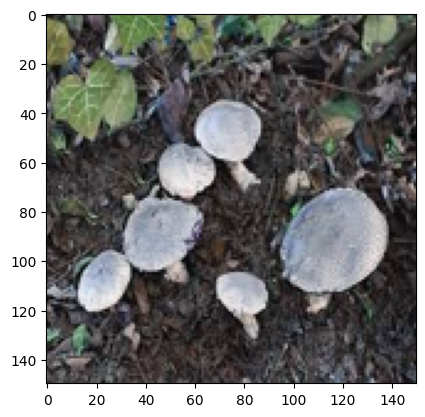

In [7]:
#Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(dataset)-1)
plt.imshow(np.reshape(dataset[image_number], (150, 150, 3)))
print("Label for this image is: ", label[image_number])

In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)


In [9]:
# normalize
X_train = X_train / 255.
X_test = X_test / 255.

In [10]:
###2 conv and pool layers. with some normalization and drops in between.

INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)


model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

C:\Users\Shubh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',            
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 148, 148, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 72, 72, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,183,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,212,513 (4.63 MB)

 Trainable params: 1,212,513 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
history = model.fit(X_train,
                         y_train,
                         batch_size = 64,
                         verbose = 1,
                         epochs = 30,
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 914ms/step - accuracy: 0.5054 - loss: 0.8206 - val_accuracy: 0.5238 - val_loss: 0.8003
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 591ms/step - accuracy: 0.5810 - loss: 0.6897 - val_accuracy: 0.5238 - val_loss: 0.6844
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 637ms/step - accuracy: 0.5892 - loss: 0.6838 - val_accuracy: 0.5238 - val_loss: 0.6813
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 667ms/step - accuracy: 0.5963 - loss: 0.6546 - val_accuracy: 0.5238 - val_loss: 0.7634
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 615ms/step - accuracy: 0.6205 - loss: 0.6476 - val_accuracy: 0.5651 - val_loss: 0.7046
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 593ms/step - accuracy: 0.6495 - loss: 0.6082 - val_accuracy: 0.6000 - val_loss: 0.6595
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 566ms/step - accuracy: 0.6559 - loss: 0.5905 - val_accuracy: 0.6476 - val_loss: 0.6396
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 550ms/step - accuracy: 0.6893 - loss: 0.5813 - val_accu

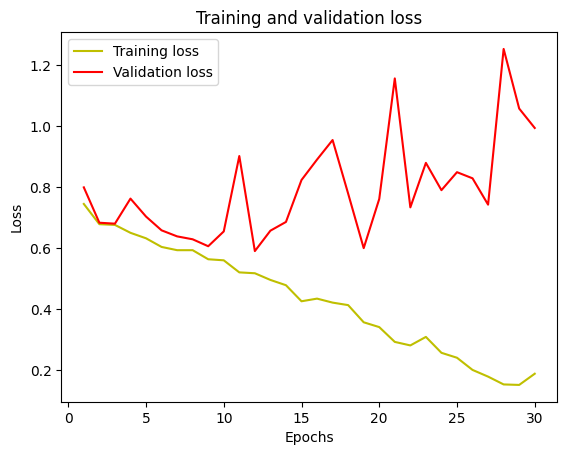

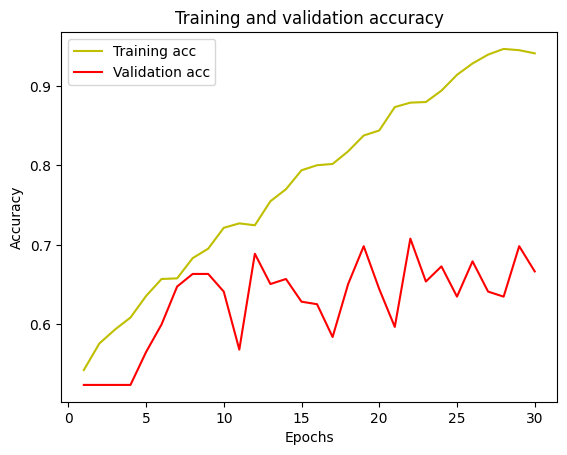

In [13]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
The prediction for this image is:  [[0.4702098]]
The actual label for this image is:  0


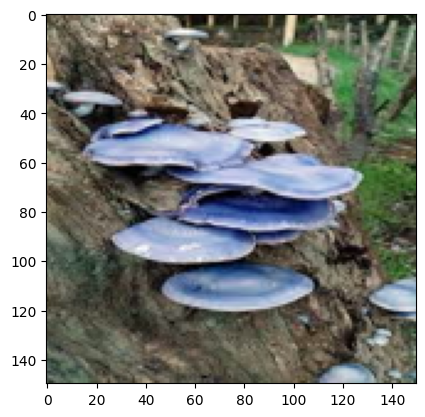

In [14]:
#Test the model on single images
n = random.randint(0, len(X_test)-1)
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])


In [15]:
#Instead of checking for each image, we can evaluate the model on all test data
#for accuracy
################################################################

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.6462 - loss: 1.0196
Accuracy =  66.66666865348816 %


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


<Axes: >

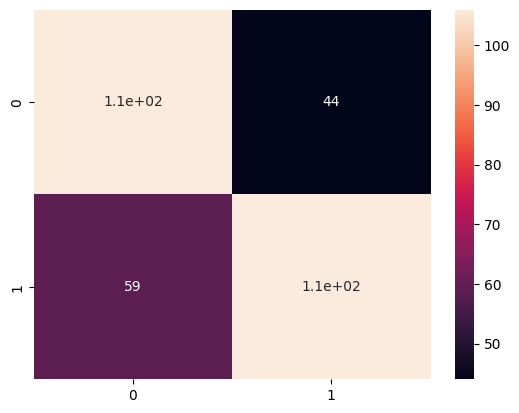

In [16]:
#How do we know how it is doing for parasitized vs uninfected?
################################################################

#Confusion matrix
#We compare labels and plot them based on correct or wrong predictions.
#Since sigmoid outputs probabilities we need to apply threshold to convert to label.

mythreshold=0.862078
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

#Check the confusion matrix for various thresholds. Which one is good?
#Need to balance positive, negative, false positive and false negative.

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


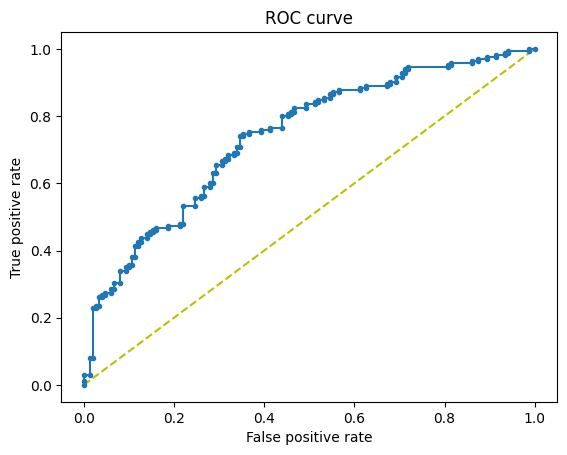

In [17]:

"""
Receiver Operating Characteristic (ROC) Curve is a plot that helps us
visualize the performance of a binary classifier when the threshold is varied.
"""
#ROC
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [18]:

import pandas as pd
i = np.arange(len(tpr))
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds'])


Ideal threshold is:  64    0.760275
Name: thresholds, dtype: float32


In [19]:

#AUC
#Area under the curve (AUC) for ROC plot can be used to understand hpw well a classifier
#is performing.
#% chance that the model can distinguish between positive and negative classes.

from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.7392727272727271



### Test


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
[[0.03366875]]
The prediction for this image is: Edible Mushroom


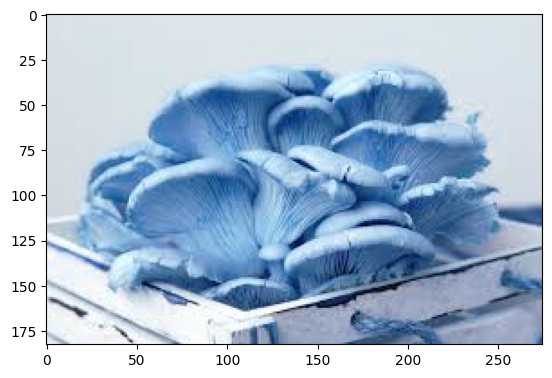

In [20]:

img = cv2.imread('test_Edible1.jpg')
plt.imshow(img)
re_img = tf.image.resize(img, (150, 150))
re_img = re_img / 255.0  # Normalize pixel values to [0, 1]

# Expand dimensions to match the model input
input_img = np.expand_dims(re_img, axis=0)  # Shape: (1, 150, 150, 3)

# Make prediction
prediction = model.predict(input_img)
print(prediction)

# Interpret the prediction
if prediction[0] > 0.5:  # Adjust threshold if needed
    print("The prediction for this image is: Poisonous Mushroom")
else:
    print("The prediction for this image is: Edible Mushroom")
